# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [23]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    xold = x0
    xnew = x0
    for i in range(maxiter):
        niter = i
        xnew -= f(xold)/fder(xold)
        if abs(xnew - xold) < eps:
            break
        xold = xnew
            
    return xnew, niter
        

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [24]:
def f(x):
    return x**2 - 1

def fder(x):
    return 2*x

print(newton_iteration(f, fder, 0.001))
print(newton_iteration(f, fder, -100))

        

(1.0000000000000118, 13)
(-1.0, 10)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [27]:
def modified_newton(f, fder, x0, m, eps=1e-5, maxiter=1000):
    xold = x0
    xnew = x0
    for i in range(maxiter):
        niter = i
        xnew -= m*f(xold)/fder(xold)
        if abs(xnew - xold) < eps:
            break
        xold = xnew
            
    return xnew, niter

def fmult(x):
    return (x**2 - 1)**2

def fdermult(x):
    return 4*x*(x**2 - 1)

print (modified_newton(fmult, fdermult, -2, 5))
print (modified_newton(fmult, fdermult, -2, 4))
print (modified_newton(fmult, fdermult, -2, 3))
print (modified_newton(fmult, fdermult, -2, 2))
print (modified_newton(fmult, fdermult, -2, 1))

#Да, сходимость квадратичная при m=2, в случае метод m = 5, m = 4 вообще расходится, при m = 3, m = 1 сходимость линейная     

(-1.1480163005898842, 999)
(-2.0, 999)
(-0.9999978588127855, 16)
(-1.000000000000001, 4)
(-1.0000078296573287, 17)


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

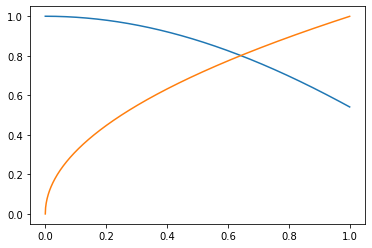

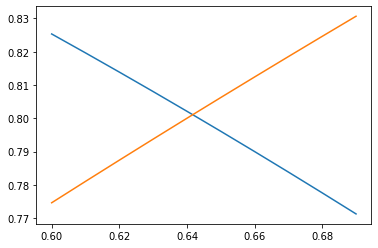

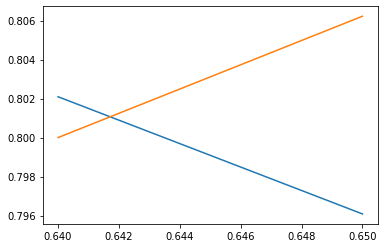

0.6417143708728826
0.6417143705014845
0.6213463413943529


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Очевидно, что так как sin(x) принимает значения в интервале [-1,1] и при этом функция sqrt(x) монотонно возрастает, 
#корень слежует искать в интервале [-1,1]. Его и будем визуализировать.
x = np.arange(0, 1000, 1)
x = x*0.001

plt.plot(x, np.cos(x), x, np.sqrt(x))
plt.show()

#Визуально локализовав корень на отрезке [-1,1], дальше можем рассмотреть график более детально и уточнить корень
y = np.arange(0.6, 0.7, 0.01)

plt.plot(y, np.cos(y), y, np.sqrt(y))
plt.show()

#корень лежит вблизи 0.64
y = np.arange(0.64, 0.65, 0.01)

plt.plot(y, np.cos(y), y, np.sqrt(y))
plt.show()

#корень лежит вблизи 0.642

def fpi(f, x0, a, eps = 10^(-5)):
    xnew = x0
    xold =x0
    for i in range (1000):
        xnew = xold - a*f(xold)
        if abs(xold - xnew) < eps:
            break
        xold = xnew
    
    return xnew
        
def F (x):
    return x - (np.cos(x))**2

def Fder(x):
    return abs(1 + 2*np.cos(x)*np.sin(x))

#здесь будем менять начальное условие
x0 = 0.5

#возьмем более-менее случайные M и m в условии на поиск корня
m = random.uniform(0, Fder(x0))
M = random.uniform(Fder(x0), Fder(x0) + 1)

#теперь посравниваем результаты, к которым сойдутся функции при разных a
print(fpi(F, x0, 2/(M + m)))
print(fpi(F, x0, 0.01))
print(fpi(F, x0, 0.001))

#действительно, самый лучший результат дает a = 2 / (M + m)

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.